In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/azliaz/Desktop/Projects/Python and Tableau - Online sales/Online Shop Customer Sales Data.csv')

In [2]:
df.head(5)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


# To identify if there's any missing values

In [4]:
df.isna().sum()

Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

In [5]:
df.columns = df.columns.str.lower()
df.head(5)

,customer_id,age,gender,revenue_total,n_purchases,purchase_date,purchase_value,pay_method,time_spent,browser,newsletter,voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


# Changing the format to purchase date to datetime 


In [6]:
df['purchase_date']=pd.to_datetime(df['purchase_date'])
df


,customer_id,age,gender,revenue_total,n_purchases,purchase_date,purchase_value,pay_method,time_spent,browser,newsletter,voucher
0,504308,53,0,45.3,2,2021-06-22,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,2021-10-12,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,2021-03-14,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,2021-10-25,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,2021-09-14,56.900,1,605,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,2021-02-15,6.213,1,894,0,0,0
65792,570100,33,0,29.3,1,2021-05-02,29.300,0,722,0,0,0
65793,570101,50,0,25.4,5,2021-10-29,23.114,3,424,0,0,0
65794,570102,56,0,29.2,1,2021-09-12,29.200,3,731,0,0,0


# Created 2 new columns for weekday and month

In [7]:
weekday = df['purchase_date'].dt.day_name()
df['weekday'] = weekday
month = df['purchase_date'].dt.month_name()
df['month'] = month
df.head(5)


,customer_id,age,gender,revenue_total,n_purchases,purchase_date,purchase_value,pay_method,time_spent,browser,newsletter,voucher,weekday,month
0,504308,53,0,45.3,2,2021-06-22,24.915,1,885,0,0,0,Tuesday,June
1,504309,18,1,36.2,3,2021-10-12,2.896,2,656,0,0,1,Tuesday,October
2,504310,52,1,10.6,1,2021-03-14,10.600,0,761,0,1,0,Sunday,March
3,504311,29,0,54.1,5,2021-10-25,43.280,1,906,0,1,0,Monday,October
4,504312,21,1,56.9,1,2021-09-14,56.900,1,605,0,1,0,Tuesday,September


# Replacing attributes in in certain fields so it's more comprehensible. 

In [8]:
df['gender'].replace({0: 'Male',1: 'Female'},inplace=True)
df['pay_method'].replace({0: 'Digital Wallets', 1: 'Card', 2: 'PayPal', 3: 'Other'}, inplace=True)
df['browser'].replace({0: 'Chrome', 1: 'Safari', 2: 'Edge', 3: 'Other'}, inplace=True)
df['newsletter'].replace({0: 'not subscribed', 1: 'subscribed'}, inplace= True)
df['voucher'].replace({0:'not used', 1: 'used'}, inplace= True)

df.head(5)

,customer_id,age,gender,revenue_total,n_purchases,purchase_date,purchase_value,pay_method,time_spent,browser,newsletter,voucher,weekday,month
0,504308,53,Male,45.3,2,2021-06-22,24.915,Card,885,Chrome,not subscribed,not used,Tuesday,June
1,504309,18,Female,36.2,3,2021-10-12,2.896,PayPal,656,Chrome,not subscribed,used,Tuesday,October
2,504310,52,Female,10.6,1,2021-03-14,10.600,Digital Wallets,761,Chrome,subscribed,not used,Sunday,March
3,504311,29,Male,54.1,5,2021-10-25,43.280,Card,906,Chrome,subscribed,not used,Monday,October
4,504312,21,Female,56.9,1,2021-09-14,56.900,Card,605,Chrome,subscribed,not used,Tuesday,September



# Re-checking info: 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     65796 non-null  int64         
 1   age             65796 non-null  int64         
 2   gender          65796 non-null  object        
 3   revenue_total   65796 non-null  float64       
 4   n_purchases     65796 non-null  int64         
 5   purchase_date   65796 non-null  datetime64[ns]
 6   purchase_value  65796 non-null  float64       
 7   pay_method      65796 non-null  object        
 8   time_spent      65796 non-null  int64         
 9   browser         65796 non-null  object        
 10  newsletter      65796 non-null  object        
 11  voucher         65796 non-null  object        
 12  weekday         65796 non-null  object        
 13  month           65796 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)


# Start analyzing the pre-processed data 
# 1. Payment methods preference



In [10]:
df['pay_method'].unique()

array(['Card', 'PayPal', 'Digital Wallets', 'Other'], dtype=object)

In [11]:
payment_count = df['pay_method'].value_counts()
payment_count

Card               19754
Digital Wallets    19075
PayPal             14551
Other              12416
Name: pay_method, dtype: int64

<Axes: title={'center': 'Payment Methods'}, ylabel=' '>

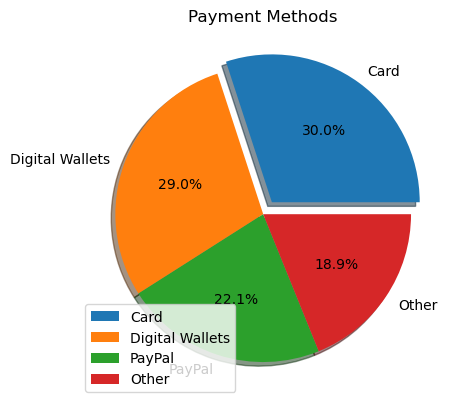

In [12]:
df['pay_method'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%', title='Payment Methods',ylabel=' ',shadow=True, explode=[0.1,0,0,0],legend=True)

# 2. Brower preference

In [13]:
df['browser'].unique()

array(['Chrome', 'Safari', 'Other', 'Edge'], dtype=object)

In [14]:
browser_count = df['browser'].value_counts()

browser_count


Chrome    42076
Safari    13135
Other      7208
Edge       3377
Name: browser, dtype: int64

<Axes: title={'center': 'Browser'}, xlabel='Browser', ylabel='Count'>

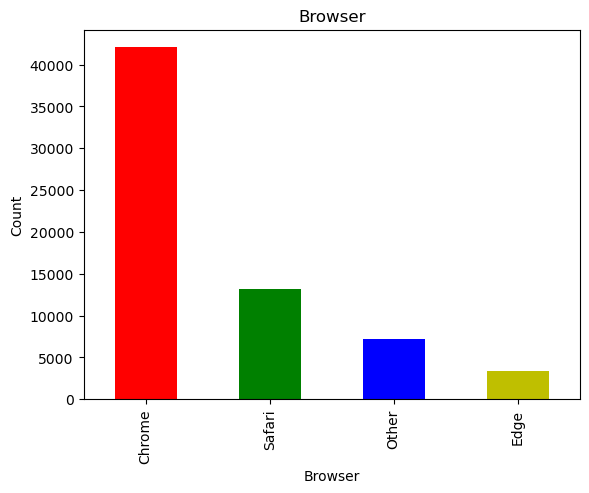

In [15]:
df['browser'].value_counts().plot(kind='bar',title='Browser',ylabel='Count',xlabel='Browser',color=['r','g','b','y'])

# 3. Newletter Subscription


<Axes: title={'center': 'Newletter Subscription'}, ylabel=' '>

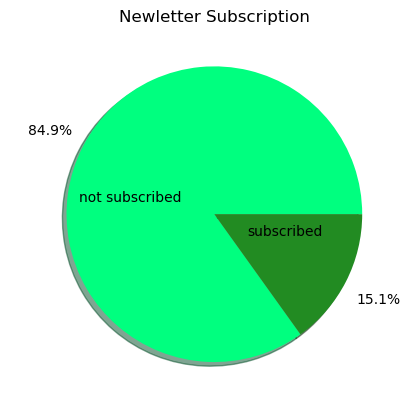

In [16]:
df['newsletter'].value_counts(normalize=True).plot(kind='pie',colors=['springgreen','forestgreen'], ylabel=' ',shadow=True,autopct='%1.1f%%',pctdistance=1.25,labeldistance=.25,title='Newletter Subscription')

# 4. Voucher Used

<Axes: title={'center': 'Vouchers Used'}, xlabel=' '>

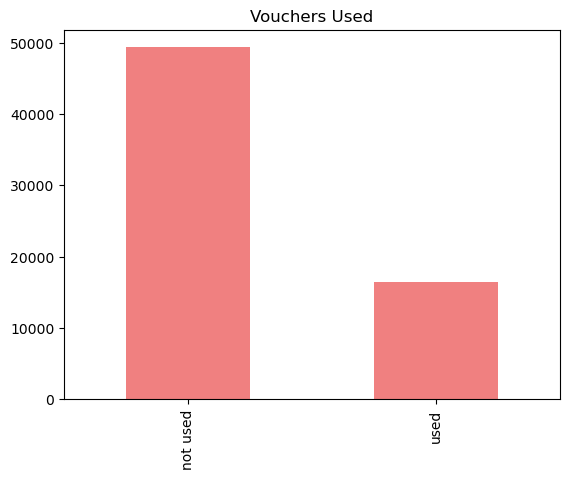

In [17]:
df['voucher'].value_counts().plot(kind='bar', title='Vouchers Used', xlabel= ' ',color=['lightcoral'])

# 5. Customer gender

In [18]:
gender_count = df['gender'].value_counts()
gender_count

Female    44172
Male      21624
Name: gender, dtype: int64

<Axes: title={'center': "Customer's Gender"}, ylabel=' '>

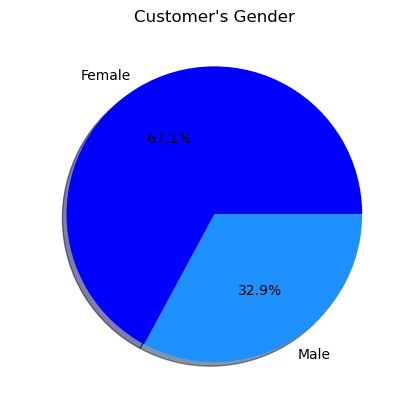

In [19]:
df['gender'].value_counts(normalize=True).plot(kind='pie',ylabel=' ',autopct='%1.1f%%',shadow=True, title='Customer\'s Gender',colors=['blue','dodgerblue'])

# 6. Total Revenue by Gender

<Axes: title={'center': 'Revenue Totals by Gender'}, xlabel='Gender', ylabel='Count'>

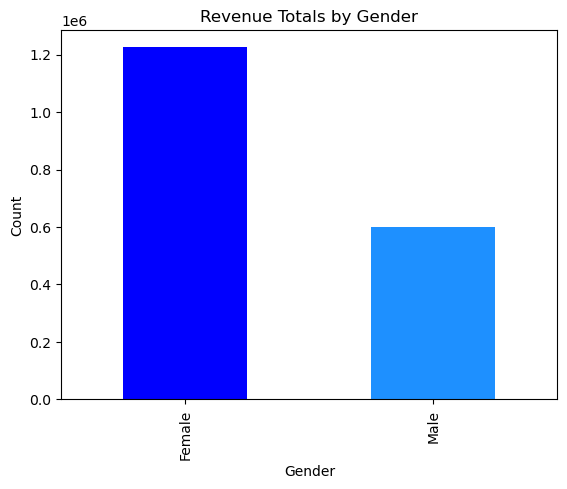

In [20]:
gender_group = df.groupby('gender')
revenue_totals = gender_group['revenue_total'].sum()

colors = ['blue', 'dodgerblue']  

revenue_totals.plot(kind='bar', title='Revenue Totals by Gender', xlabel='Gender', ylabel='Count', color=colors)


# 7. Number of Purchases by Gender

<Axes: title={'center': 'Number of Purchases by Gender'}, xlabel='Gender', ylabel='Count'>

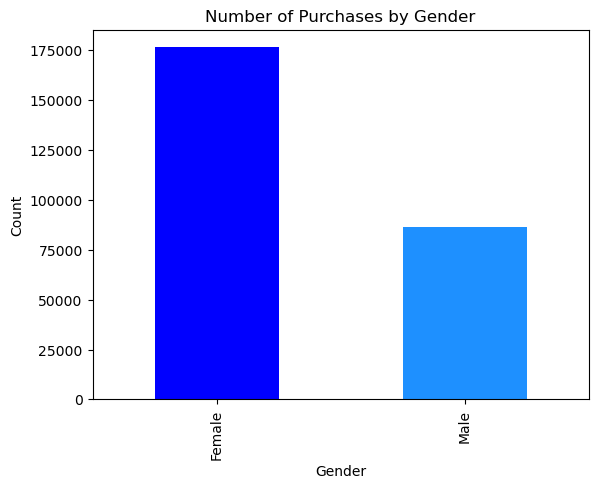

In [21]:
gender_group = df.groupby('gender')
n_purchases_totals = gender_group['n_purchases'].sum()

colors = ['blue', 'dodgerblue'] 

n_purchases_totals.plot(kind='bar', title='Number of Purchases by Gender', xlabel='Gender', ylabel='Count', legend=False, color=colors)


# 8. Time Spendt by Gender

array([<Axes: ylabel=' '>], dtype=object)

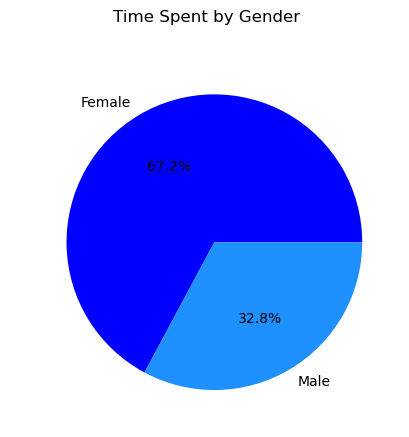

In [22]:
gender_group = df.groupby('gender')
time_spent_totals = gender_group['time_spent'].sum()

colors = ['blue', 'dodgerblue']  

time_spent_totals.plot(kind='pie', ylabel=' ', colors=colors, title='Time Spent by Gender', legend=False, subplots=True, autopct='%1.1f%%')


# 9. Purchase and Revenue over days

In [23]:
day_group = df.groupby('weekday')
month_group = df.groupby('month')
day_group.agg({'revenue_total':'sum','n_purchases':'sum'})

,revenue_total,n_purchases
weekday,,
Friday,262926.8,37773
Monday,258630.5,37581
Saturday,260542.2,37356
Sunday,259513.5,37358
Thursday,261789.1,37837
Tuesday,260463.7,37329
Wednesday,260850.4,37455


# 9.1 Number of Purchases Over Days

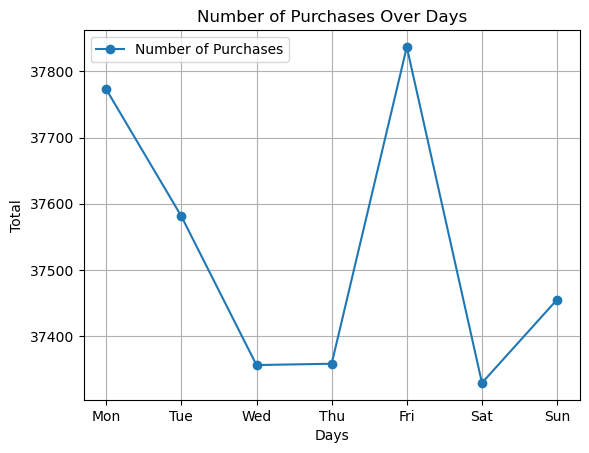

In [55]:
# Number of purchase data
data_days = {
    'Days':['Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat', 'Sun'],
    'Number_of_Purchases': [37773, 37581, 37356, 37358, 37837, 37329, 37455]  
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data_days)

# Set the month column as the index
df.set_index('Days', inplace=True)

# Create a line chart with number of purchases)
df.plot(kind='line', marker='o')

# Add labels and a title
plt.xlabel('Days')
plt.ylabel('Total')
plt.title('Number of Purchases Over Days')

# Show the chart
plt.legend(["Number of Purchases"])
plt.grid(True)
plt.show()


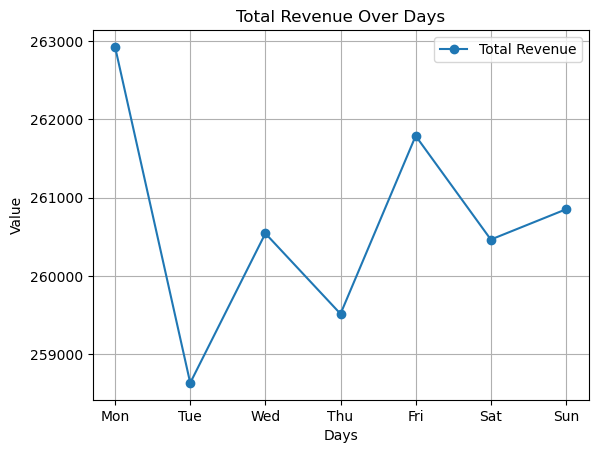

In [51]:
# Total revenue data
data_days = {
    'Days': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat', 'Sun'],
    'Revenue':[262926.8, 258630.5, 260542.2, 259513.5, 261789.1,260463.7,260850.4 ],  
    #'Number_of_Purchases': [37773, 37581, 37356, 37358, 37837, 37329, 37455]  
}

# Create a DataFrame from the revenue data
df = pd.DataFrame(data_days)

# Set the month column as the index
df.set_index('Days', inplace=True)

# Create a line chart with total revenue)
df.plot(kind='line', marker='o')

# Add labels and a title
plt.xlabel('Days')
plt.ylabel('Value')
plt.title('Total Revenue Over Days')

# Show the chart
plt.legend(["Total Revenue"])
plt.grid(True)
plt.show()








# 10. Total Purchase and Revenue over Months

In [47]:
month_group.agg({'revenue_total':'sum','n_purchases':'sum'}).sort_values(by='revenue_total')


,revenue_total,n_purchases
month,,
February,139984.8,20080
November,148604.4,21315
September,149247.7,21982
April,150555.0,21740
June,151084.0,21771
March,152954.1,21790
July,153629.6,22069
October,154409.0,22023
May,154563.4,22460


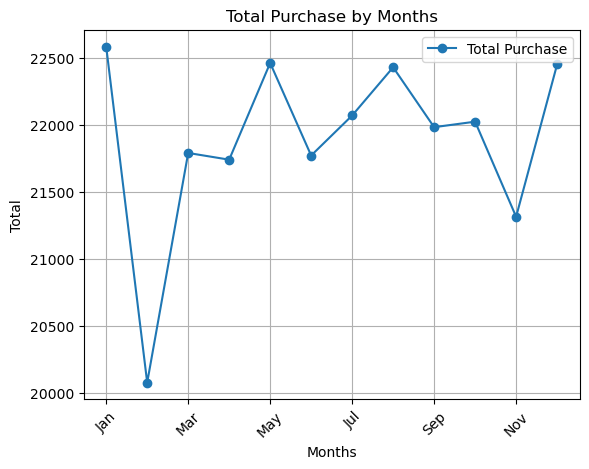

In [54]:
# Total of purchase data
data_months = {
    'Months': ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'],
    'Number_of_Purchases':[22582, 20080, 21790, 21740, 22460, 21771, 22069, 22428, 21982, 22023, 21315,  22449 ],  

}

# Create a DataFrame from the revenue data
df = pd.DataFrame(data_months)

# Set the month column as the index
df.set_index('Months', inplace=True)

# Create a line chart with total revenue)
df.plot(kind='line', marker='o')

# Add labels and a title
plt.xlabel('Months')
plt.ylabel('Total')
plt.title('Total Purchase by Months')

# Show the chart
plt.legend(["Total Purchase"])
plt.grid(True)
plt.xticks(rotation=45)
plt.show() 

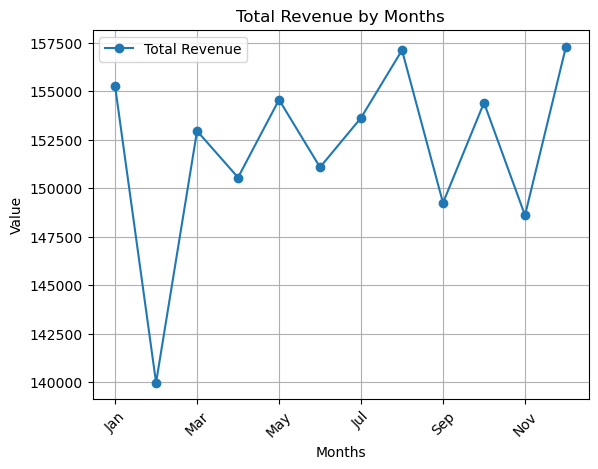

In [57]:
# Total of Revenue per month data
data_months = {
    'Months': ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'],
    'Revenue':[155268.0,139984.8, 152954.1, 150555.0, 154563.4, 151084.0, 153629.6, 157115.4, 149247.7, 154409.0, 148604.4, 157300.8],  

}

# Create a DataFrame from the revenue data
df = pd.DataFrame(data_months)

# Set the month column as the index
df.set_index('Months', inplace=True)

# Create a line chart with total revenue)
df.plot(kind='line', marker='o')

# Add labels and a title
plt.xlabel('Months')
plt.ylabel('Value')
plt.title('Total Revenue by Months')

# Show the chart
plt.legend(["Total Revenue"])
plt.grid(True)
plt.xticks(rotation=45)
plt.show() 